## Chapter 2

### 2.3 통계학에서의 표본분포

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
loans_income = pd.read_csv('../gunwo/dataset/loans_income.csv')

In [3]:
loans_income = loans_income['x']

In [4]:
type(loans_income)

pandas.core.series.Series

In [5]:
sample_data = pd.DataFrame({
    'income' : loans_income.sample(1000),
    'type' : 'Data',
})

In [6]:
sample_mean_05 = pd.DataFrame({
    'income' : [loans_income.sample(5).mean() for _ in range(1000)],
    'type' : 'Mean of 5',
})

In [7]:
sample_mean_05

,income,type
0,81720.0,Mean of 5
1,73919.2,Mean of 5
2,76000.0,Mean of 5
3,63660.0,Mean of 5
4,57276.0,Mean of 5
...,...,...
995,58988.8,Mean of 5
996,67760.0,Mean of 5
997,54300.0,Mean of 5
998,52780.0,Mean of 5


In [8]:
sample_mean_20 = pd.DataFrame({
    'income' : [loans_income.sample(20).mean() for _ in range(1000)],
    'type' : 'Mean of 20',
})

In [9]:
sample_mean_20

,income,type
0,79510.45,Mean of 20
1,68975.50,Mean of 20
2,76519.10,Mean of 20
3,78400.85,Mean of 20
4,69487.85,Mean of 20
...,...,...
995,69882.15,Mean of 20
996,55198.05,Mean of 20
997,68431.00,Mean of 20
998,66575.60,Mean of 20


         income  type
46751   38348.0  Data
40488   80000.0  Data
25515  175000.0  Data
10106   48000.0  Data
17868   52000.0  Data


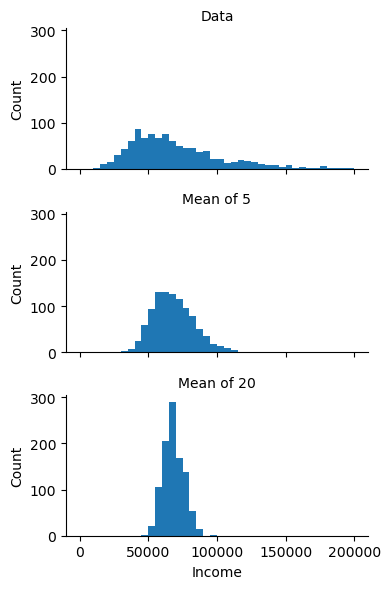

In [10]:
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

### 2.4 부트스트랩

In [11]:
## The Bootstrap

results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')


Bootstrap Statistics:
original: 62000.0
bias: -75.27049999999872
std. error: 224.13084172858427


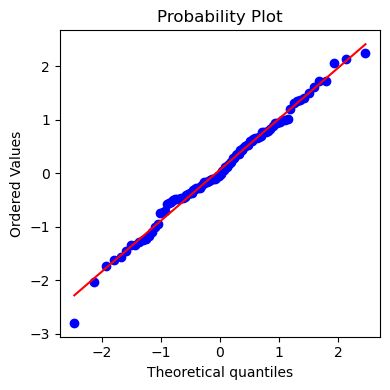

In [12]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

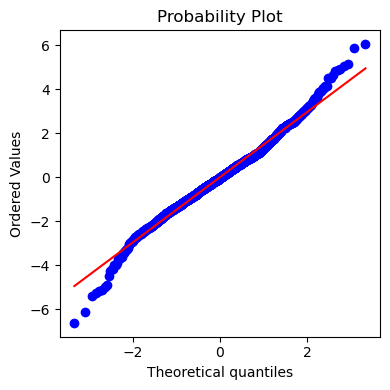

In [13]:
## Long-Tailed Distributions
sp500_px = pd.read_csv('../gunwo/dataset/sp500_data.csv.gz',compression='gzip')

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()


In [14]:
## Binomial Distribution

print(stats.binom.pmf(2, n=5, p=0.1))

print(stats.binom.cdf(2, n=5, p=0.1))


0.07289999999999992
0.99144


In [2]:
%matplotlib inline

from pathlib import Path
import random

import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

import matplotlib.pylab as plt

In [3]:
session_times = pd.read_csv('./dataset/web_page_data.csv')
session_times.Time = 100 * session_times.Time

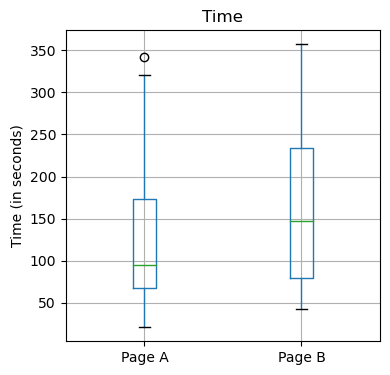

In [4]:
ax = session_times.boxplot(by='Page', column='Time',
                           figsize=(4, 4))
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

plt.tight_layout()
plt.show()